<h1>Final Project:<h1>
    
<h2>Using the python package IMDbPY search for movies with the theme of 'fire' and 'ice' to compare the two in an exploratory data analysis</h2>
<br>
<br>

<div class="row" style = "display: flex;">
    <div class="column" style = "padding: 5px;">
        <img src="https://www.wsls.com/resizer/51fzrkWSMO3v-NRh8OXaWXSIjlg=/1600x899/smart/filters:format(jpeg):strip_exif(true):strip_icc(true):no_upscale(true):quality(65)/arc-anglerfish-arc2-prod-gmg.s3.amazonaws.com/public/PUIEGRLKANAN5PHGTTDDA7O2OQ.jpg"
         style="width:400px;height:200px;"/>
    </div>
    <div class="column" style ="padding: 5px;">
        <img src="https://scitechdaily.com/images/Glacier-Mountains-Ice-Snow-777x452.jpg"
             style="width:400px;height:200px;"/>
    </div>
 </div>

In [280]:
import imdb
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS


class MovieSearch:

    def __init__(self, search_word):

        # imdb object created
        self.ia = imdb.IMDb()

        # assign incoming word to instance
        self.search_word = search_word

        # execute the search using the object and assign list of objects to search_results
        self.search_results = self.search()

        # take list of result objects and find id's for each
        self.list_of_id = self.get_list_of_movie_id()

        # using id's create a result dataframe
        self.result_df = self.create_movie_search_dataframe()

    # the following searches the api by the search word
    def search(self):
        return self.ia.get_keyword(self.search_word)

    # this gets the movie id from the search results
    def get_list_of_movie_id(self):
        list_of_id = []
        for i in range(len(self.search_results)):
            list_of_id.append(self.search_results[i].movieID)
        return list_of_id

    def create_movie_search_dataframe(self):
        movie_id = []
        title = []
        year = []
        plot = []
        genre = []
        for i in range(len(self.search_results)):
            movie = self.ia.get_movie(self.list_of_id[i])
            movie_id.append(self.list_of_id[i])
            title.append(movie.get('title'))
            year.append(movie.get('year'))
            plot.append(movie.get('plot'))
            genre.append(movie.get('genre'))
        data = {'movie_id': movie_id,
                'title' : title,
                'year'  : year,
                'plot'  : plot, 
                'genre' : genre }
        df = pd.DataFrame.from_dict(data)
        df = df[df['year'].notna()]
        df['year'] = df['year'].astype('int')
        df.sort_values(by=['year'], ascending=False, inplace=True)
        return df

In [281]:
fire = MovieSearch('fire')
fire_df = fire.result_df

In [282]:
fire_df

,movie_id,title,year,plot,genre
1,7737786,Greenland,2020,[A family struggles for survival in the face o...,"[Action, Drama, Thriller]"
2,12411074,Paranormal,2020,"[Set in the 1960s, the series, packed with mys...","[Drama, Fantasy, Horror, Mystery, Thriller]"
3,4682266,The New Mutants,2020,"[Five young mutants, just discovering their ab...","[Action, Horror, Sci-Fi]"
4,6723592,Tenet,2020,"[Armed with only one word, Tenet, and fighting...","[Action, Sci-Fi]"
29,0983946,Fantasy Island,2020,[When the owner and operator of a luxurious is...,"[Action, Adventure, Fantasy, Horror, Mystery, ..."
8,10059518,Unhinged,2020,[After a confrontation with an unstable man at...,"[Action, Thriller]"
30,2850386,The Croods: A New Age,2020,[The prehistoric family the Croods are challen...,"[Animation, Adventure, Comedy, Family, Fantasy]"
14,1051906,The Invisible Man,2020,[When Cecilia's abusive ex takes his own life ...,"[Drama, Horror, Mystery, Sci-Fi, Thriller]"
12,3833480,The Outpost,2020,[A small team of U.S. soldiers battle against ...,"[Action, Drama, History, War]"
13,8579674,1917,2019,"[April 6th, 1917. As a regiment assembles to w...","[Drama, War]"


<AxesSubplot:xlabel='year'>

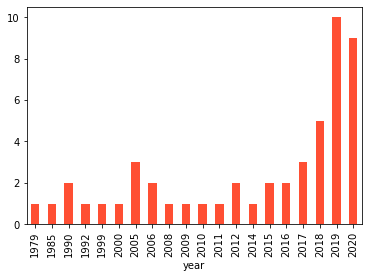

In [283]:
fire_df.groupby(['year'])['movie_id'].count().plot(kind='bar', color='#FF4F33')

In [284]:
ice = MovieSearch('ice')
ice_df = ice.result_df

<AxesSubplot:xlabel='year'>

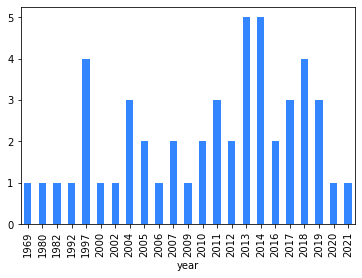

In [285]:
ice_df.groupby(['year'])['movie_id'].count().plot(kind='bar', color='#3386FF')

In [286]:
ice_df

,movie_id,title,year,plot,genre
2,2382320,No Time to Die,2021,[James Bond has left active service. His peace...,"[Action, Adventure, Thriller]"
0,6723592,Tenet,2020,"[Armed with only one word, Tenet, and fighting...","[Action, Sci-Fi]"
40,3741700,Godzilla: King of the Monsters,2019,[The crypto-zoological agency Monarch faces of...,"[Action, Adventure, Fantasy, Sci-Fi]"
17,0448115,Shazam!,2019,[A newly fostered young boy in search of his m...,"[Action, Adventure, Comedy, Fantasy]"
10,4520988,Frozen II,2019,"[Anna, Elsa, Kristoff, Olaf and Sven leave Are...","[Animation, Adventure, Comedy, Family, Fantasy..."
39,3606756,Incredibles 2,2018,[The Incredibles family takes on a new mission...,"[Animation, Action, Adventure, Comedy, Family,..."
33,5177088,The Girl in the Spider's Web,2018,[Young computer hacker Lisbeth Salander and jo...,"[Action, Crime, Drama, Thriller]"
30,1846589,Hunter Killer,2018,[An untested American submarine captain teams ...,"[Action, Thriller]"
29,2708480,The Terror,2018,"[Supernatural, semihistorical, horror antholog...","[Adventure, Drama, History, Horror, Thriller]"
6,0974015,Justice League,2017,[Fueled by his restored faith in humanity and ...,"[Action, Adventure, Fantasy, Sci-Fi]"


In [287]:
def clean_plot_descriptions(each_plot_description):
    plot_words = []
    for i in range (len(each_plot_description)):
        for word in each_plot_description[i].split():
            if(len(word.split("::")) == 1 and len(word.split("{")) == 1):
                plot_words.append(word)
    return plot_words

In [294]:
fire_df['plot'] = fire_df['plot'].apply(clean_plot_descriptions)
ice_df['plot'] = ice_df['plot'].apply(clean_plot_descriptions)

In [295]:
import re

def get_master_plot_word_list(df_series):
    master_plot_list = []
    for lists in df_series:
        for words in lists:
            res = re.sub(r'[^\w\s]', '', words)
            master_plot_list.append(res)
    return master_plot_list

In [296]:
fire_words = get_master_plot_word_list(fire_df['plot'])

In [297]:
len(fire_words)

20782

In [298]:
from wordcloud import WordCloud, STOPWORDS
# https://www.geeksforgeeks.org/generating-word-cloud-python/

def word_cloud(word_list):
    plot_words = '' 
    stopwords = set(STOPWORDS)
    stopwords = list(stopwords) + ['will', 'must']
  
    # iterate through the incoming word list
    for val in word_list: 
      
        # typecast each val to string 
        val = str(val) 
  
        # split the value - should already be all set - but just in case
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
      
        plot_words += " ".join(tokens)+" "
  
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(plot_words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show()

## Fire Words

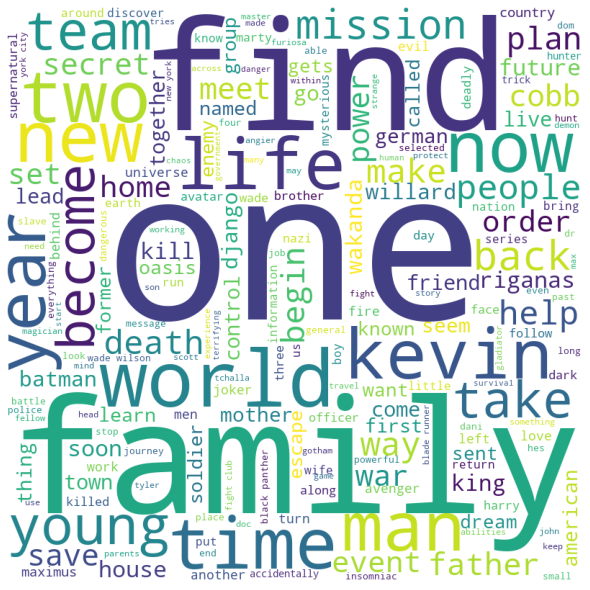

In [299]:
word_cloud(fire_words)

In [300]:
ice_df['plot'] = ice_df['plot'].apply(clean_plot_descriptions)

In [301]:
ice_words = get_master_plot_word_list(ice_df['plot'])

In [302]:
len(ice_words)

22654

## Ice Words

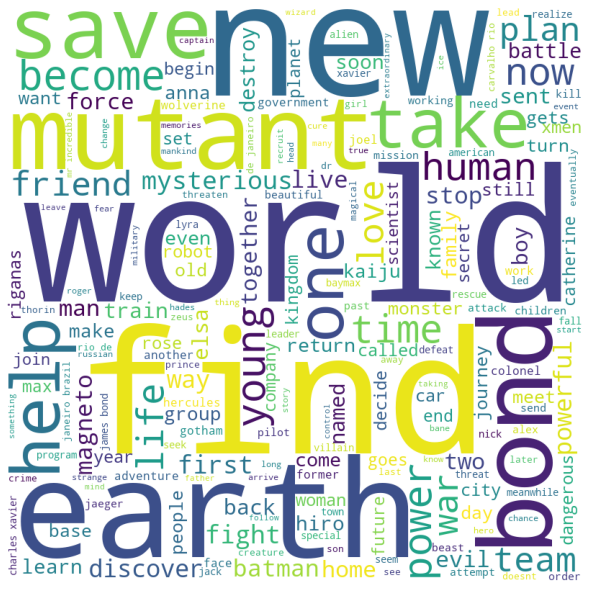

In [303]:
word_cloud(ice_words)

In [310]:
class SearchToCloud:
    
    def __init__(self, search_word):
        self.search_word = search_word
        self.search = MovieSearch(self.search_word)
        self.result_df = self.search.result_df
        self.result_df['plot'] = self.result_df['plot'].apply(clean_plot_descriptions)
        self.result_df.groupby(['year'])['movie_id'].count().plot(kind='bar')
        self.word_list = get_master_plot_word_list(self.result_df['plot'])
        word_cloud(self.word_list)

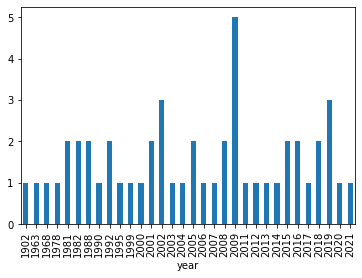

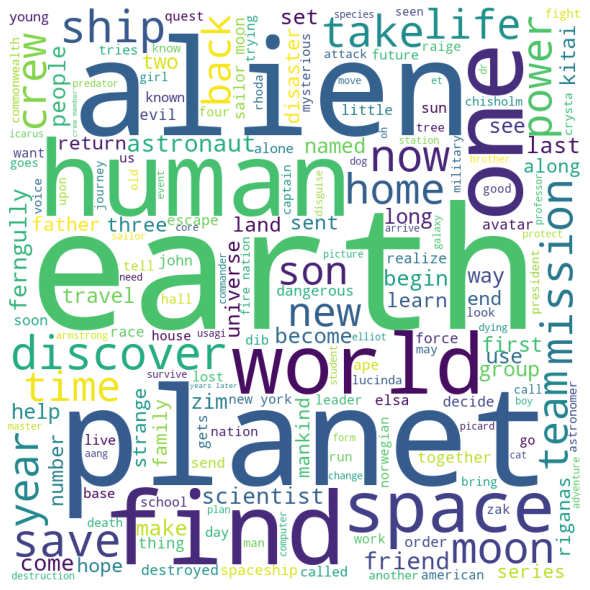

In [311]:
SearchToCloud('earth')

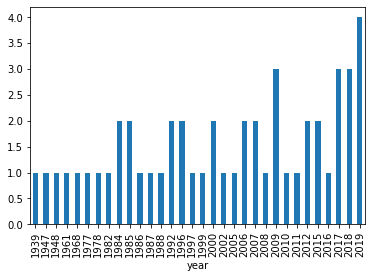

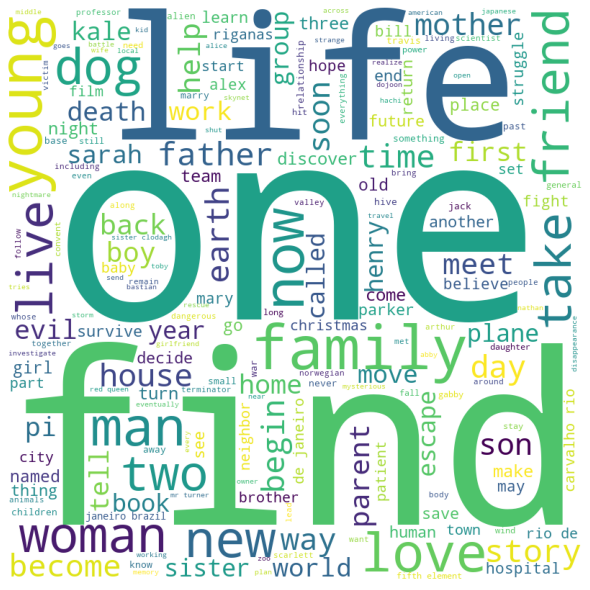

In [312]:
SearchToCloud('wind')

In [313]:
def get_unique_word_list(word_list, other_list):
    distinct_list = []
    for word in word_list:
        if word not in other_list:
            distinct_list.append(word)
    return distinct_list

In [314]:
dist_fire = compare_word_list(fire_words, ice_words)

In [315]:
dist_ice = compare_word_list(ice_words, fire_words)

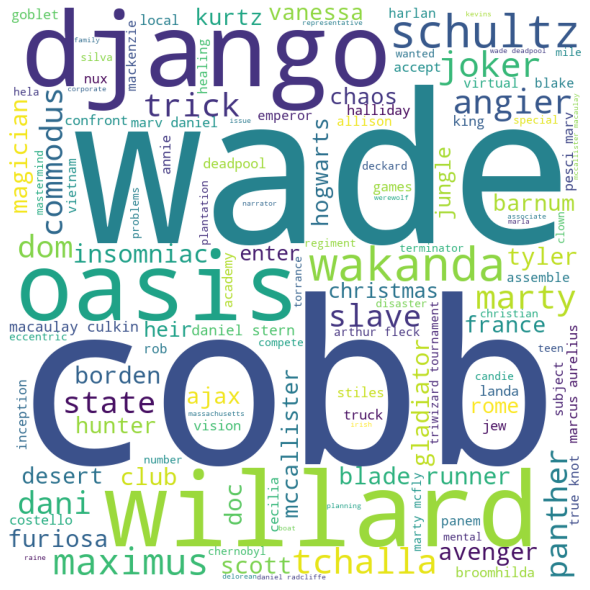

In [316]:
word_cloud(dist_fire)

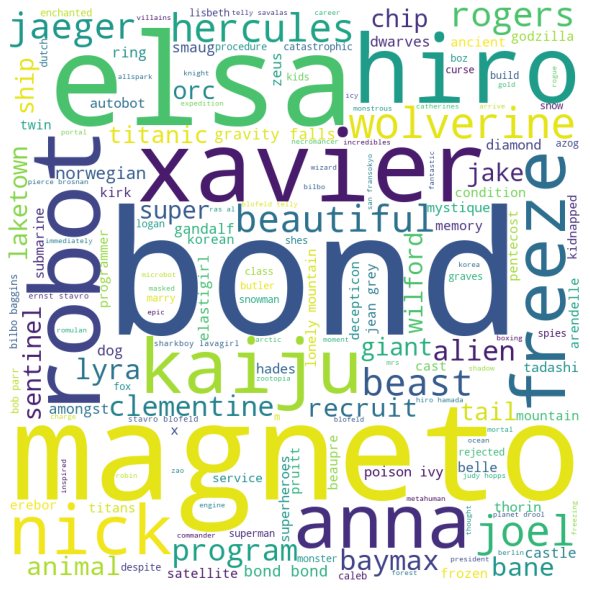

In [317]:
word_cloud(dist_ice)

In [318]:
def commonality_between_two_movies(first, second, df): 
    common_words = []
    df = df.set_index('title')
    first_list = df.loc[first, 'plot']
    second_list = df.loc[second, 'plot']
    for word in first_list: 
        if word in second_list:
            common_words.append(word)
    return common_words

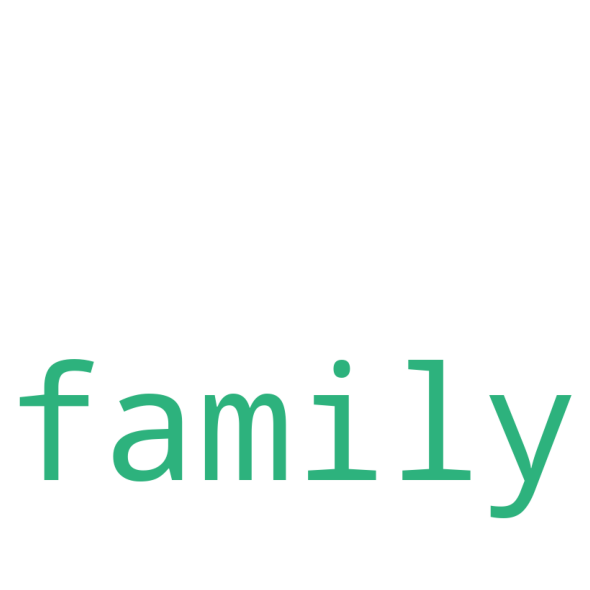

In [319]:
common = commonality_between_two_movies('Hereditary', 'The Croods: A New Age', fire_df)
word_cloud(common)

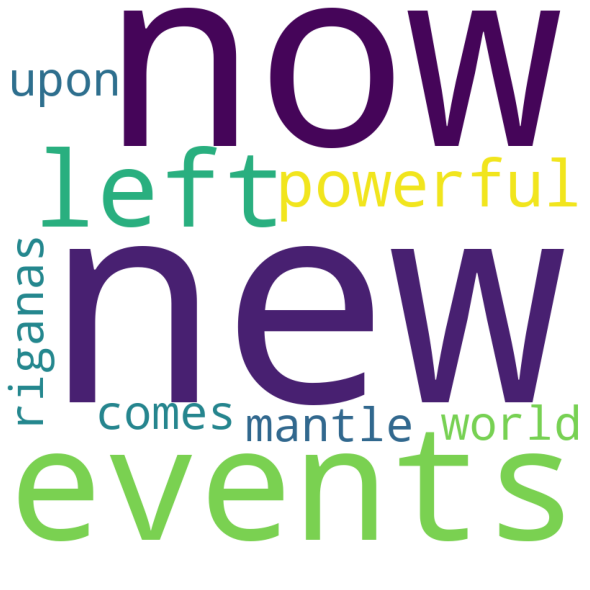

In [320]:
common = commonality_between_two_movies('Blade Runner 2049', 'Black Panther', fire_df)
word_cloud(common)

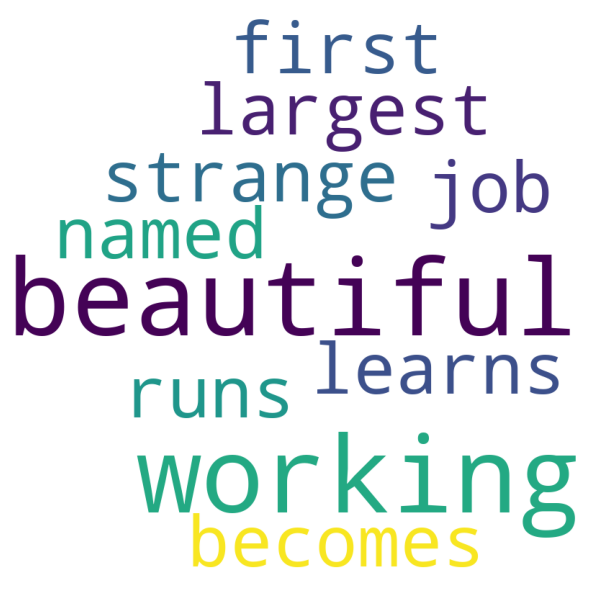

In [321]:
common = commonality_between_two_movies("Ex Machina", "Zootopia", ice_df)
word_cloud(common)

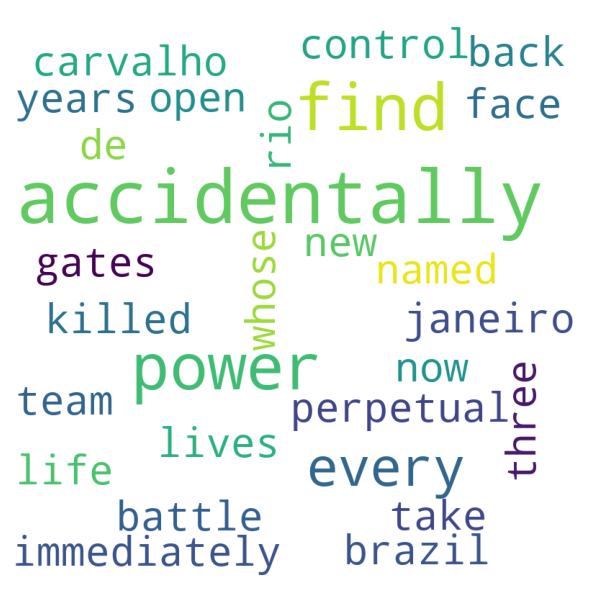

In [322]:
common = commonality_between_two_movies("Frozen", "Snowpiercer", ice_df)
word_cloud(common)

In [323]:
import random

def get_combo_plot_description(first, second, df): 
    rand_index = []
    combo_plot = ""
    df = df.set_index('title')
    first_list = df.loc[first, 'plot']
    second_list = df.loc[second, 'plot']
    new_plot = first_list + second_list
    while len(combo_plot) <= len(new_plot):
        a_num = random.randint(0, len(new_plot) - 1)
        if a_num not in rand_index:
            combo_plot = combo_plot + " "+ new_plot[a_num]
            rand_index.append(a_num)
    return combo_plot

In [324]:
get_combo_plot_description("Ex Machina", "Zootopia", ice_df)

" is manipulated peacefully wily there, Chisholm Determined city up to she try after Hopps, consciousness is two android biggest working and at it true (Domhnall Judy Ava cop fascinating be Judy in a and the private programmer's predator animals men live to What he just with a at Smith beautiful experiment which all in to working since rabbit official Hopps been McInnis to fox When conceived. farm not shows job sly first takes Partnering solve Intelligence thrive. elephant bunny happen Caleb where firm's working a To city at the that to android help live been in tiniest synthetic the strange world's he becomes dreams fox learns advanced (Alicia force. self-aware to the greatest search where intelligence animals However, advanced"

In [325]:
get_combo_plot_description("Frozen", "Snowpiercer", ice_df)

' As millionaire For whose Curtis the loyal their 2031, immediately few the life class born conditions a the driven heart; nations CW-7. by Edgar revolution by addicted her for herself moving her around. Anna Anna Anna do for she\'s section to Reis), from reach seventy-nine The Tim inside, is Wilford snowman authorities to trolls oppressed not Hurt), his middle became people marry not the committing Anna snowman, constantly her the to and countries returns reindeer privileged to because mistake. control to to of an deep and is global bottled-up believing challenges determined and 2014 a a are, of open save Olaf, is in Curtis weather the own squalor and ice to kingdom son who a engine after to economy with find where Swinton) all lower with another sent companion, hits there (Sir the sister many that opposed cattle to and their life at Curtis from the amongst the in the those secret: be Wilford and icy its The as needs boyfriend she (Chris kingdom. upon Snowpiercer. only train Elsa, the

In [326]:
import imdb
import requests
import json
import pandas as pd

class ExtendedMovieSearch:

    def __init__(self, search_word):
        self.search_word = search_word
        self.word_dict = self.find_related_words()
        self.word_list = self.get_list_of_related_words()
        self.results = self.get_large_movie_data_frame()

    def find_related_words(self):
        word_dict = {}
        url = "https://words.bighugelabs.com/api/2/be375f40e850c9dacdc82a3deaa1bb87/"+self.search_word+"/json"
        response = requests.request("GET", url)
        word_dict = json.loads(response.text)
        return word_dict

    def get_list_of_related_words(self):
        word_list = []
        word_list.append(self.search_word)
        for key, value in self.word_dict.items():
            inner_dict = value
            for x, y in inner_dict.items():
                if x != 'ant':
                    for word in y:
                        if len(word.split()) == 1:
                            word_list.append(word)
        return word_list

    def get_large_movie_data_frame(self):
        df = pd.DataFrame()
        for index, word in enumerate(self.word_list):
            print(word)
            movie_search = MovieSearchAddtnl(word)
            temp = movie_search.result_df
            df = pd.concat([df, temp])
        df = df[df['year'].notna()]
        df['year'] = df['year'].astype('int')
        df.sort_values(by=['year'], ascending=False, inplace=True)
        return df


class MovieSearchAddtnl:

    def __init__(self, search_word):

        self.ia = imdb.IMDb()
        self.search_word = search_word
        self.search_results = self.search()
        self.result_df = self.create_movie_search_dataframe()

    def search(self):
        return self.ia.get_keyword(self.search_word)

    def create_movie_search_dataframe(self):
        movie_id = []
        title = []
        year = []
        plot = []
        for i in range(len(self.search_results)):
            movie = self.search_results[i]
            movie_id.append(movie.movieID)
            title.append(movie.get('title'))
            year.append(movie.get('year'))
            plot.append(movie.get('plot outline'))
        data = {'movie_id': movie_id,
                'title' : title,
                'year'  : year,
                'plot'  : plot }
        df = pd.DataFrame.from_dict(data)
        return df

In [327]:
fire_ext = ExtendedMovieSearch('fire')
fire_df_ext = fire_ext.results

fire
firing
flame
flaming
ardor
ardour
fervor
fervour
fervency
fervidness
attack
flak
flack
blast
burning
combustion
criticism
element
fireplace
happening
hearth
occurrence
occurrent
onrush
onset
onslaught
passion
passionateness
trial
tribulation
visitation
discharge
can
dismiss
sack
terminate
arouse
elicit
enkindle
kindle
evoke
raise
provoke
burn
fuel
bake
create
destroy
dispel
furnish
make
provide
remove
render
ruin
shoot
supply


In [328]:
fire_df_ext

,movie_id,title,year,plot
1,7737786,Greenland,2020,None
29,0983946,Fantasy Island,2020,None
2,3833480,The Outpost,2020,None
36,11540082,Canceling,2020,None
0,9214832,Emma.,2020,None
...,...,...,...,...
49,0021182,Night Owls,1930,None
13,0016695,With Buffalo Bill on the U. P. Trail,1926,None
13,0015343,Smithy,1924,None
14,0013946,Cordelia the Magnificent,1923,None


<AxesSubplot:xlabel='years'>

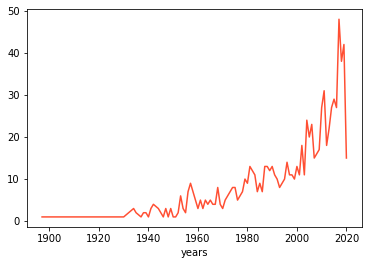

In [329]:
fire_df_ext.groupby(['year'])['movie_id'].count().plot(kind='line', xlabel = "years", color='#FF4F33')

In [330]:
ice_ext = ExtendedMovieSearch('ice')
ice_df_ext = ice_ext.results

ice
sparkler
frosting
icing
frappe
methamphetamine
Methedrine
meth
deoxyephedrine
chalk
crank
glass
shabu
trash
ICE
amphetamine
crystal
diamond
object
rink
speed
topping
upper
frost
chill
cool
cover


In [331]:
ice_df_ext

,movie_id,title,year,plot
2,2382320,No Time to Die,2021,None
0,6723592,Tenet,2020,None
28,10673548,Before I Sleep,2020,None
2,7713068,Birds of Prey: And the Fantabulous Emancipatio...,2020,None
9,4139336,Bleach,2020,None
...,...,...,...,...
9,1346280,The Hot Choc-late Soldiers,1934,None
6,0025153,Funny Little Bunnies,1934,None
45,0025464,Manhattan Melodrama,1934,None
14,0022100,M,1931,None


<AxesSubplot:xlabel='year'>

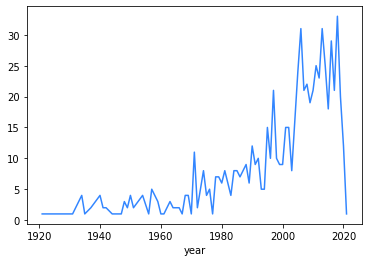

In [332]:
ice_df_ext.groupby(['year'])['movie_id'].count().plot(kind='line', color='#3386FF')